# ***Model Training***


In [1]:

import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### **We review the remaining columns of the Dataset**

In [2]:
df = pd.read_csv("../data/clean_data.csv")
df

,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,initial_quantity,available_quantity,free_shipping,mode,local_pick_up
0,new,bronze,80.0,buy_it_now,True,False,active,1,1,False,not_specified,True
1,used,silver,2650.0,buy_it_now,True,False,active,1,1,False,me2,True
2,used,bronze,60.0,buy_it_now,True,False,active,1,1,False,me2,True
3,new,silver,580.0,buy_it_now,True,False,active,1,1,False,me2,True
4,used,bronze,30.0,buy_it_now,True,False,active,1,1,False,not_specified,True
...,...,...,...,...,...,...,...,...,...,...,...,...
99368,used,free,30.0,buy_it_now,True,False,active,1,1,False,me2,True
99369,new,bronze,239.0,buy_it_now,True,False,active,5,5,False,not_specified,False
99370,used,bronze,600.0,buy_it_now,True,False,active,1,1,False,me2,False
99371,used,bronze,50.0,buy_it_now,True,False,active,1,1,False,me2,True


In [3]:
original_col = df.columns
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode',
       'accepts_mercadopago', 'automatic_relist', 'status', 'initial_quantity',
       'available_quantity', 'free_shipping', 'mode', 'local_pick_up'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99373 entries, 0 to 99372
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            99373 non-null  object 
 1   listing_type_id      99373 non-null  object 
 2   price                99373 non-null  float64
 3   buying_mode          99373 non-null  object 
 4   accepts_mercadopago  99373 non-null  bool   
 5   automatic_relist     99373 non-null  bool   
 6   status               99373 non-null  object 
 7   initial_quantity     99373 non-null  int64  
 8   available_quantity   99373 non-null  int64  
 9   free_shipping        99373 non-null  bool   
 10  mode                 99373 non-null  object 
 11  local_pick_up        99373 non-null  bool   
dtypes: bool(4), float64(1), int64(2), object(5)
memory usage: 6.4+ MB


### **Libraries for creating models**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [7]:
le = LabelEncoder()
df['condition'] = le.fit_transform(df['condition'])  # 0 = usado, 1 = nuevo

df = pd.get_dummies(df, columns=['listing_type_id', 'buying_mode', 'status', 'mode'])

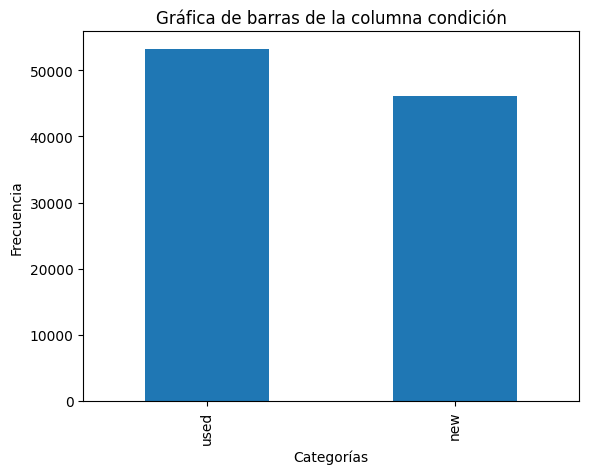

In [8]:
conteo_valores = df['condition'].value_counts()

conteo_valores.plot(kind='bar')

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfica de barras de la columna condición')

plt.xticks(ticks=[0, 1], labels=['used', 'new'])

plt.show()

### **Training and Testing**

In [9]:
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos a probar
estimators = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Ejecutar los modelos y evaluar el rendimiento
for name, estimator in estimators.items():
    # Entrenar el modelo
    estimator.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = estimator.predict(X_test)
    
    print(f"\n========== {name} ==========")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | Precision: {precision_score(y_test, y_pred):.4f} | Recall: {recall_score(y_test, y_pred):.4f} | F1-Score: {f1_score(y_test, y_pred):.4f}")


========== Logistic Regression ==========
Accuracy: 0.5338 | Precision: 0.0000 | Recall: 0.0000 | F1-Score: 0.0000


c:\semestres_uao\ETL\Talleres\model_training\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



========== Random Forest ==========
Accuracy: 0.8243 | Precision: 0.7819 | Recall: 0.8642 | F1-Score: 0.8210

========== Decision Tree ==========
Accuracy: 0.8216 | Precision: 0.7825 | Recall: 0.8551 | F1-Score: 0.8172


c:\semestres_uao\ETL\Talleres\model_training\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:35:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



========== XGBoost ==========
Accuracy: 0.8285 | Precision: 0.8049 | Recall: 0.8344 | F1-Score: 0.8194


### **Graphing of the most important columns of the Random XGBoost model**

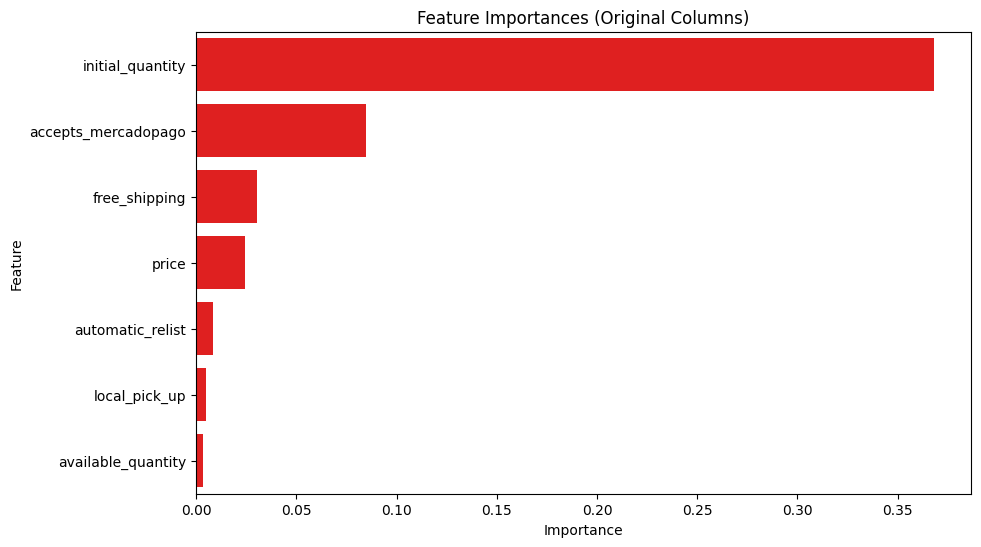

In [ ]:
rf = XGBClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Filtrar el DataFrame para solo las columnas originales
feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(original_col)]

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')
plt.title('Feature Importances (Original Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Saving the model in PKL

In [14]:
import joblib

rf = XGBClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, '../model/XGboost.pkl')
print("Modelo guardado exitosamente")

Modelo guardado exitosamente
